In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
vehicle_id STRING 车辆唯一标志码
time INT 时间
state INT 车辆状态（1 代表启动，2 代表熄火，3 代表其他）
GPS_lat FLOAT 纬度
GPS_lon FLOAT 经度
"""

data = pd.read_csv('track_data.csv')
data.head()

,time,state,GPS_lon,GPS_lat,vehicle_id
0,20171001000010,NaN,117.106695,40.159000,4
1,20171001000020,NaN,117.106703,40.158992,4
2,20171001000030,NaN,117.106713,40.158985,4
3,20171001000040,NaN,117.106736,40.158991,4
4,20171001000050,NaN,117.106737,40.158998,4


In [12]:
# 筛选时间
"""
v1:20180505003414~20180520172231
v2:20180103003659~20180416091822
v3:20171023235404~20171204015011
v4:20171021174303~20171122161235
"""
#v1 = data[(data.vehicle_id == 1) & (data.time >= 20180505003414) & (data.time <= 20180520172231)].copy()
#v2 = data[(data.vehicle_id == 2) & (data.time >= 20180103003659) & (data.time <= 20180416091822)].copy()
#v3 = data[(data.vehicle_id == 3) & (data.time >= 20171023235404) & (data.time <= 20171204015011)].copy()
#v4 = data[(data.vehicle_id == 4) & (data.time >= 20171021174303) & (data.time <= 20171122161235)].copy()
v1=data[(data.vehicle_id==1)]
v2=data[(data.vehicle_id==2)]
v3=data[(data.vehicle_id==3)]
v4=data[(data.vehicle_id==4)]
len(data), len(v1) + len(v2) + len(v3) + len(v4), len(v1), len(v2), len(v3), len(v4)

(2019381, 2019381, 147029, 733945, 422797, 715610)

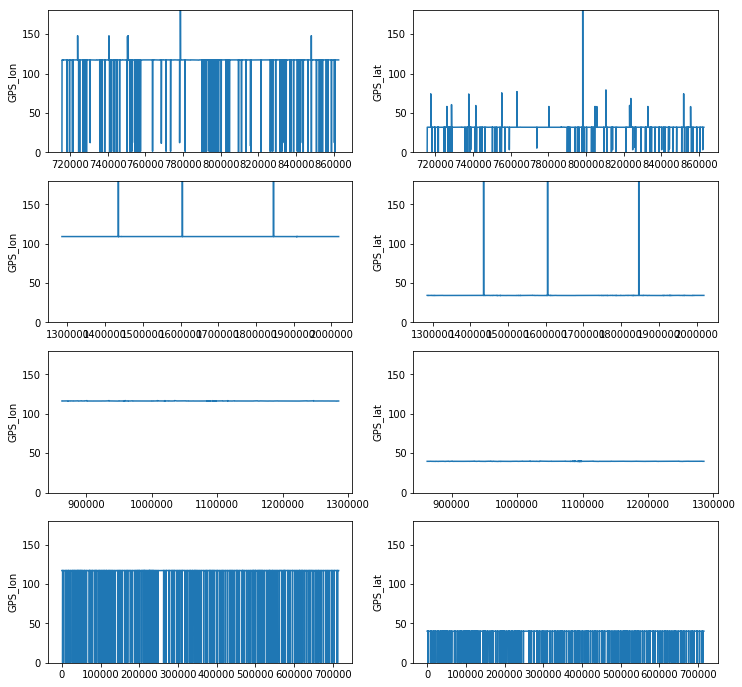

In [13]:
plt.figure(figsize = (12, 12))

for i, v in enumerate([v1, v2, v3, v4]):
    plt.subplot(4, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(4, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

In [14]:
# 筛选经纬
"""
v1: lon (116,118) lat (31,32)
v2: lon (108,110) lat (34,35)
v3: lon (116,117) lat (39,41)
v4: lon (116,118) lat (40,41)
"""

v1.loc[(v1.GPS_lon < 116) | (v1.GPS_lon > 118), 'GPS_lon'] = np.nan
v1.loc[(v1.GPS_lat < 31) | (v1.GPS_lat > 33), 'GPS_lat'] = np.nan

v2.loc[(v2.GPS_lon < 108) | (v2.GPS_lon > 110), 'GPS_lon'] = np.nan
v2.loc[(v2.GPS_lat < 34) | (v2.GPS_lat > 35), 'GPS_lat'] = np.nan

v3.loc[(v3.GPS_lon < 116) | (v3.GPS_lon > 117), 'GPS_lon'] = np.nan
v3.loc[(v3.GPS_lat < 39) | (v3.GPS_lat > 41), 'GPS_lat'] = np.nan

v4.loc[(v4.GPS_lon < 116) | (v4.GPS_lon > 118), 'GPS_lon'] = np.nan
v4.loc[(v4.GPS_lat < 40) | (v4.GPS_lat > 41), 'GPS_lat'] = np.nan

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


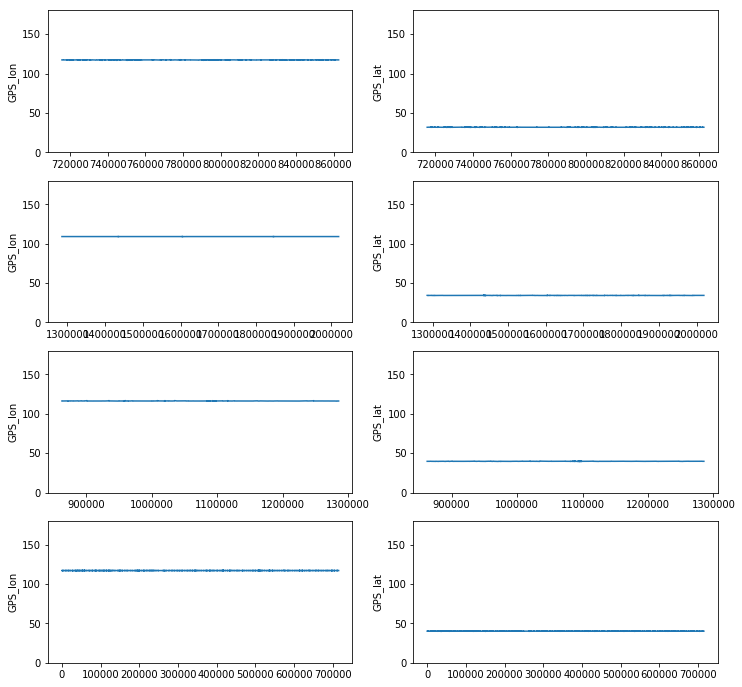

In [15]:
plt.figure(figsize = (12, 12))

for i, v in enumerate([v1, v2, v3, v4]):
    plt.subplot(4, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(4, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

In [16]:
# 插值填充
v1['GPS_lon'] = v1['GPS_lon'].interpolate()
v1['GPS_lat'] = v1['GPS_lat'].interpolate()

v2['GPS_lon'] = v2['GPS_lon'].interpolate()
v2['GPS_lat'] = v2['GPS_lat'].interpolate()

v3['GPS_lon'] = v3['GPS_lon'].interpolate()
v3['GPS_lat'] = v3['GPS_lat'].interpolate()

v4['GPS_lon'] = v4['GPS_lon'].interpolate()
v4['GPS_lat'] = v4['GPS_lat'].interpolate()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

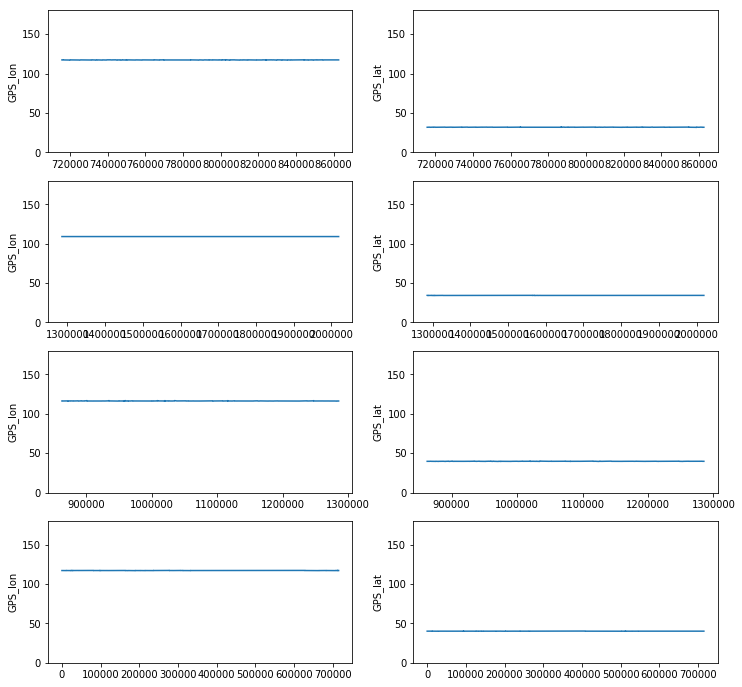

In [17]:
plt.figure(figsize = (12, 12))

for i, v in enumerate([v1, v2, v3, v4]):
    plt.subplot(4, 2, i*2+1)
    plt.plot(v.index, v['GPS_lon'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lon')

    plt.subplot(4, 2, i*2+2)
    plt.plot(v.index, v['GPS_lat'])
    plt.ylim(0, 180)
    plt.ylabel('GPS_lat')

# 轨迹计算

In [18]:
from math import *

def distance(lon1, lat1, lon2, lat2):
    # 地球平均半径
    R = 6371.0
    
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [19]:
y = []

for v in [v1, v2, v3, v4]:
    d = 0
    for i in range(len(v) - 1):
        lon1 = v.iloc[i]['GPS_lon']
        lat1 = v.iloc[i]['GPS_lat']
        lon2 = v.iloc[i+1]['GPS_lon']
        lat2 = v.iloc[i+1]['GPS_lat']
        d += distance(lon1, lat1, lon2, lat2)
    y.append(d)

y

[nan, 35316.420253144475, 18230.218063852884, 19286.389920899288]

In [ ]:
df = pd.DataFrame({'vehicle_id': [1,2,3,4], 'track_mileage': y})
df = df[['vehicle_id', 'track_mileage']]
df.to_csv('./track-submit_张彬城_暨南大学_15521106350_20181030.csv', index=False)

![title](../pdf/1.png)